Material de exemplos da parte 1A

In [3]:
import numpy as np

def impseq(n0,n1,n2):
    
    #      Generates x(n) = delta(n-n0); n1 <= n <= n2
    #      ----------------------------------------------
    #      [x,n] = impseq(n0,n1,n2)
    #     
        
    n=np.array(range(n1,n2+1))
    x = n-n0
    for i in range(len(x)):
        if x[i]!=0: x[i]=0
        else: x[i]=1
    #x = (n-n0) == 0
    return [x,n]

def stepseq(n0,n1,n2):
    #     Generates x(n) = u(n-n0); n1 <= n <= n2
    #     ------------------------------------------
    #     [x,n] = stepseq(n0,n1,n2)
    #
    n=np.arange(n1,n2+1)
    x = n-n0
    for i in range(len(x)):
        if x[i]<0: x[i]=0
        else: x[i]=1
    #x = [(n-n0) >= 0]
    return [x,n]

def  sigadd(x1,n1,x2,n2):
    # % implements y(n) = x1(n)+x2(n)
    # % -----------------------------
    # % [y,n] = sigadd(x1,n1,x2,n2)
    # % y = sum sequence over n, which includes n1 and n2
    # % x1 = first sequence over n1
    # % x2 = second sequence over n2 (n2 can be different from n1)
    # %
    n = np.arange(min(n1.min(0),n2.min(0)),max(n1.max(0),n2.max(0))+1) # duration of y(n)
    y1 = np.zeros((1,len(n)))  #initialization
    y1=y1[0,:]
    y2 = y1.copy()
    y1[np.nonzero(np.logical_and((n>=n1.min(0)),(n<=n1.max(0)))==1)]=x1.copy()
    y2[np.nonzero(np.logical_and((n>=n2.min(0)),(n<=n2.max(0)))==1)]=x2.copy()
    y = y1+y2;
    return [y,n]


def  sigmult(x1,n1,x2,n2):
    # % implements y(n) = x1(n)*x2(n)
    # % -----------------------------
    # % [y,n] = sigmult(x1,n1,x2,n2)
    # % y = product sequence over n, which includes n1 and n2
    # % x1 = first sequence over n1
    # %
    n = np.arange(min(n1.min(0),n2.min(0)),max(n1.max(0),n2.max(0))+1) # duration of y(n)
    y1 = np.zeros((1,len(n)))  #initialization
    y1=y1[0,:]
    y2 = y1.copy()
    y1[np.nonzero(np.logical_and((n>=n1.min(0)),(n<=n1.max(0)))==1)]=x1.copy()
    y2[np.nonzero(np.logical_and((n>=n2.min(0)),(n<=n2.max(0)))==1)]=x2.copy()
    y = y1*y2
    return [y,n]


def sigshift(x,m,k):
    # % implements y(n) = x(n-k)
    # % -------------------------
    # % [y,n] = sigshift(x,m,k)
    # %
    n = m+k
    y = x.copy()
    return [y,n]


def sigfold(x,n):
    # % implements y(n) = x(-n)
    # % -----------------------
    # % [y,n] = sigfold(x,n)
    # %
    y = np.flip(x)
    n = -np.flip(n)
    return [y,n]

def conv_m(x,nx,h,nh):
    # Modified convolution routine for signal processing
    # --------------------------------------------------
    # [y,ny] = conv_m(x,nx,h,nh)
    # [y,ny] = convolution result
    # [x,nx] = first signal
    # [h,nh] = second signal
    # 
    nyb = nx[0]+nh[0]
    nye = nx[len(x)-1] + nh[len(h)-1]
    ny = np.arange(nyb,nye+1)
    y = np.convolve(x,h)
    return [y,ny]



<StemContainer object of 3 artists>

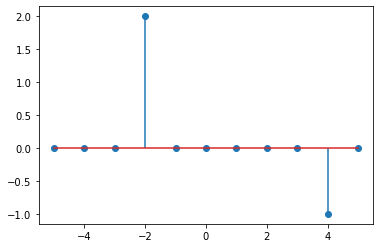

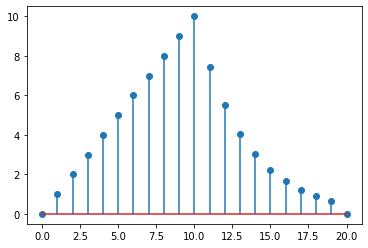

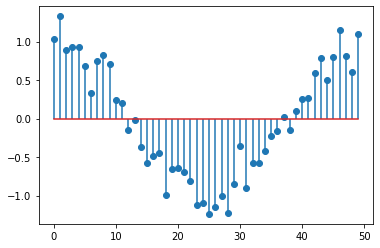

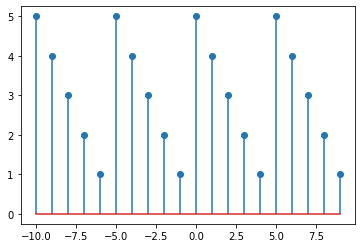

In [5]:
import matplotlib.pyplot as plt
#from fDSP import impseq,stepseq,sigadd,sigmult,sigshift,sigfold
import numpy as np

#exemplo 2.1a
[x1,n1] = impseq(-2,-5,5) 
[x2,n2] = impseq(4,-5,5)
[y,n] = sigadd(2*x1,n1,-x2,n2)

plt.figure()
plt.stem(n,y)


#exemplo 2.1b
[x1,n1] = stepseq(0,0,20) 
[x2,n2] = stepseq(10,0,20)
[y11,n11] = sigadd(x1,n1,-x2,n2)
[y1,n1] = sigmult(y11,n11,n11,n11)

[x1,n1] = stepseq(10,0,20) 
[x2,n2] = stepseq(20,0,20)
[y11,n11] = sigadd(x1,n1,-x2,n2)
y21=10*np.exp(-0.3*(n11-10))
[y2,n2] = sigmult(y11,n11,y21,n11)

[y,n] = sigadd(y1,n1,y2,n2)

plt.figure()
plt.stem(n,y)


#exemplo 2.1c
n=np.array(range(50))
x1=np.cos(0.04*np.pi*n)
x2=0.2 * np.random.randn(len(n))
y=x1+x2

plt.figure()
plt.stem(n,y)

#exemplo 2.1d
n=np.arange(-10,10)
x=np.array([5,4,3,2,1])
y=np.tile(x,4)

plt.figure()
plt.stem(n,y)


<StemContainer object of 3 artists>

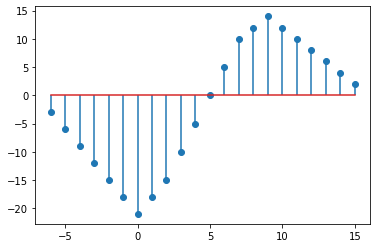

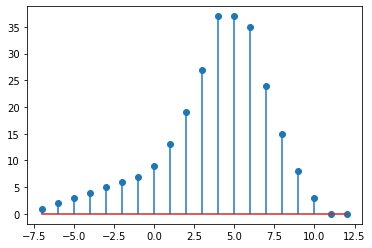

In [6]:
import matplotlib.pyplot as plt
#from fDSP import impseq,stepseq,sigadd,sigmult,sigshift,sigfold
import numpy as np

n = np.arange(-2,11)
x = np.array(list(range(1,8))+list(range(6,0,-1)))

#exemplo 2.2a
[x11,n11] = sigshift(x,n,5)
[x12,n12] = sigshift(x,n,-4)
[x1,n1] = sigadd(2*x11,n11,-3*x12,n12)

plt.figure()
plt.stem(n1,x1)

#exemplo 2.2b
[x21,n21] = sigfold(x,n)
[x21,n21] = sigshift(x21,n21,3)
[x22,n22] = sigshift(x,n,2)
[x22,n22] = sigmult(x,n,x22,n22)
[x2,n2] = sigadd(x21,n21,x22,n22)

plt.figure()
plt.stem(n2,x2)


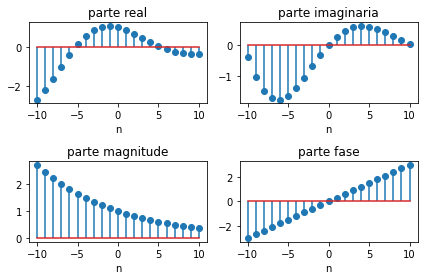

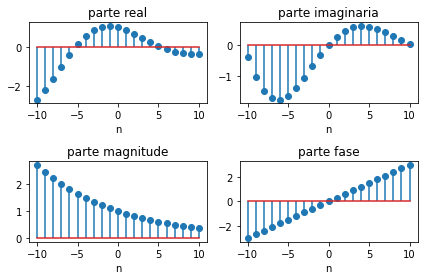

In [8]:
import matplotlib.pyplot as plt
#from fDSP import impseq,stepseq,sigadd,sigmult,sigshift,sigfold
import numpy as np


#exemplo 2.3

n = np.arange(-10,11)
alpha = -0.1+0.3j
x = np.exp(alpha*n)

fig, axs = plt.subplots(nrows=2, ncols=2)
axs[0, 0].set_title("parte real")
axs[0, 0].stem(n,np.real(x))
axs[0, 0].set_xlabel("n")

axs[0, 1].set_title("parte imaginaria")
axs[0, 1].stem(n,np.imag(x))
axs[0, 1].set_xlabel("n")

axs[1, 0].set_title("parte magnitude")
axs[1, 0].stem(n,np.abs(x))
axs[1, 0].set_xlabel("n")

axs[1, 1].set_title("parte fase")
axs[1, 1].stem(n,np.angle(x))
axs[1, 1].set_xlabel("n")

fig.tight_layout()

fig, axs = plt.subplots(nrows=2, ncols=2)
axs[0, 0].set_title("parte real")
axs[0, 0].stem(n,np.real(x))
axs[0, 0].set_xlabel("n")

axs[0, 1].set_title("parte imaginaria")
axs[0, 1].stem(n,np.imag(x))
axs[0, 1].set_xlabel("n")

axs[1, 0].set_title("parte magnitude")
axs[1, 0].stem(n,np.abs(x))
axs[1, 0].set_xlabel("n")

axs[1, 1].set_title("parte fase")
axs[1, 1].stem(n,np.angle(x))
axs[1, 1].set_xlabel("n")

fig.tight_layout()
